<a href="https://colab.research.google.com/github/nidhi-158/AirQuality/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_excel("/content/AirQualityUCI.xlsx", sheet_name=0)

In [ ]:
df.shape

(9357, 18)

In [ ]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,dayofweek
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604,2004-09-21 16:00:00,11.498557,3.009939
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00,0.000000,0.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275,2004-06-16 05:00:00,5.000000,1.000000
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823,2004-09-21 16:00:00,11.000000,3.000000
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223,2004-12-28 03:00:00,18.000000,5.000000
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,2005-04-04 14:00:00,23.000000,6.000000
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670,NaN,6.923182,2.000323


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,dayofweek
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00,18,2
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00,19,2
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00,20,2
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00,21,2
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00,22,2


In [ ]:
df.replace(-200,np.nan,inplace=True)

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,dayofweek
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00,18,2
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00,19,2
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00,20,2
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00,21,2
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00,22,2


In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'datetime', 'hour', 'dayofweek'],
      dtype='object')

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

In [ ]:
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

In [ ]:
df.drop(columns=['Date','Time'])

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,dayofweek
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00,18,2
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004-03-10 19:00:00,19,2
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004-03-10 20:00:00,20,2
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004-03-10 21:00:00,21,2
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004-03-10 22:00:00,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,2005-04-04 10:00:00,10,0
9353,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,2005-04-04 11:00:00,11,0
9354,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,2005-04-04 12:00:00,12,0
9355,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,2005-04-04 13:00:00,13,0


In [ ]:
columns_to_fill=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

In [ ]:
for col in columns_to_fill:
  mean_value=df[col].mean()
  df[col].fillna(mean_value,inplace=True)

<ipython-input-17-e0401033f4fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value,inplace=True)


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


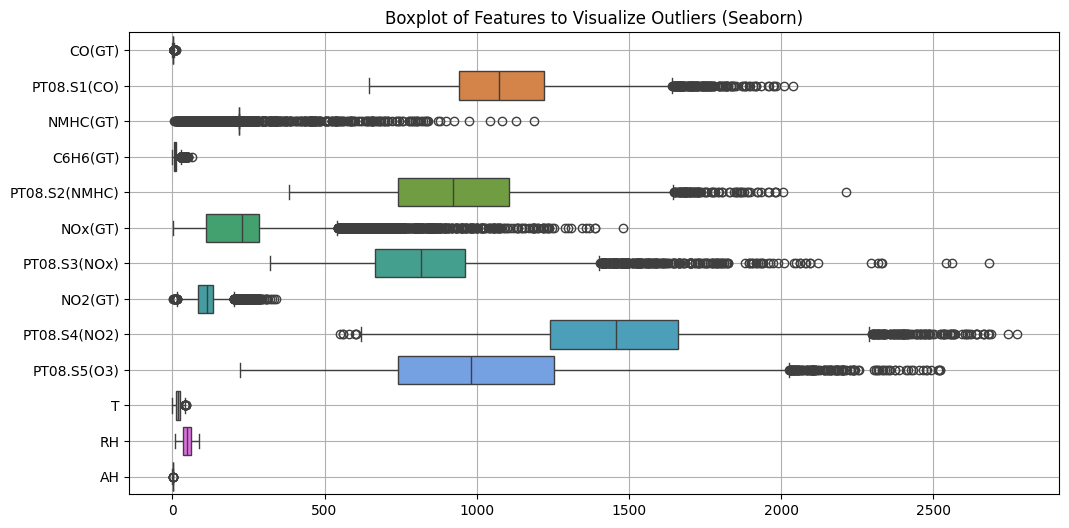

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_fill], orient='h')
plt.title("Boxplot of Features to Visualize Outliers (Seaborn)")
plt.grid(True)
plt.show()

In [ ]:
# Handling outliers
Q1 = df[columns_to_fill].quantile(0.25)
Q3 = df[columns_to_fill].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[((df[columns_to_fill] >= lower_bound) &
                     (df[columns_to_fill] <= upper_bound)).all(axis=1)]

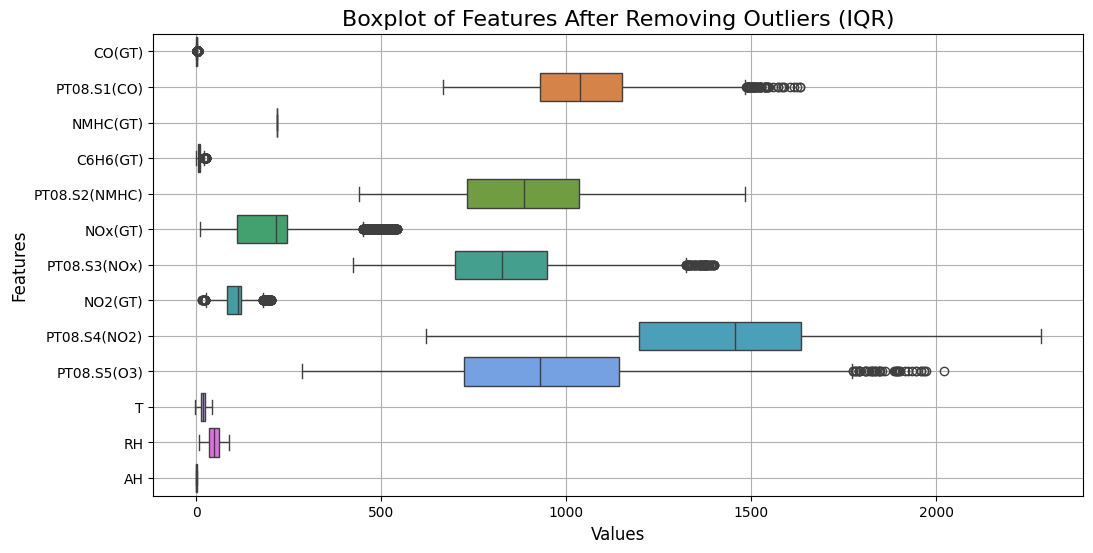

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[columns_to_fill], orient='h')
plt.title("Boxplot of Features After Removing Outliers (IQR)", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Define input (X) and output (y) features
X = df_no_outliers[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek']]
y = df_no_outliers[['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']]

In [ ]:
# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.007684284845613262
R-squared: 0.7975377349152676


In [ ]:
# Function to categorize air quality
def categorize_air_quality(value, pollutant):
    if pollutant == 'CO':
        if value <= 4.4:
            return 'Good'
        elif value <= 9.4:
            return 'Moderate'
        else:
            return 'Bad'
    elif pollutant == 'NO2':
        if value <= 53:
            return 'Good'
        elif value <= 100:
            return 'Moderate'
        else:
            return 'Bad'
    elif pollutant == 'NOx':
        if value <= 53:
            return 'Good'
        elif value <= 100:
            return 'Moderate'
        else:
            return 'Bad'
    elif pollutant == 'C6H6':
        if value <= 0.039:
            return 'Good'
        elif value <= 0.099:
            return 'Moderate'
        else:
            return 'Bad'

In [ ]:
# Predict air quality based on user input
def predict_air_quality(user_input):
    # Scale the user input
    user_input_scaled = scaler_X.transform([user_input])

    # Predict scaled outputs
    y_pred_scaled = model.predict(user_input_scaled)

    # Rescale the outputs back to the original range
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Categorize each pollutant
    categories = {}
    pollutants = ['CO', 'NMHC', 'NOx', 'NO2', 'C6H6']
    for i, pollutant in enumerate(pollutants):
        categories[pollutant] = categorize_air_quality(y_pred[0][i], pollutant)

    # Display results
    print("\nPredicted Concentrations:")
    for i, pollutant in enumerate(pollutants):
        print(f"{pollutant}: {y_pred[0][i]:.2f}")

    print("\nAir Quality Categories:")
    for pollutant, category in categories.items():
        print(f"{pollutant}: {category}")

In [ ]:
# Get user input
def get_user_input():
    features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)',
                'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek']
    user_input = []
    for feature in features:
        while True:
            try:
                value = float(input(f"Enter value for {feature}: "))
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
    return user_input

In [ ]:
# Get input, predict, and display results
user_input = get_user_input()
predict_air_quality(user_input)

Enter value for PT08.S1(CO): 0.8
Enter value for PT08.S2(NMHC): 0.7
Enter value for PT08.S3(NOx): 0.6
Enter value for PT08.S4(NO2): 0.9
Enter value for PT08.S5(O3): 0.5
Enter value for T: 29
Enter value for RH: 60
Enter value for AH: 0.7
Enter value for hour: 12
Enter value for dayofweek: 4

Predicted Concentrations:
CO: 1.36
NMHC: 218.81
NOx: 153.11
NO2: 93.29
C6H6: 2.78

Air Quality Categories:
CO: Good
NMHC: None
NOx: Bad
NO2: Moderate
C6H6: Bad


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
